# Machine Learning Preprocessing Script

This script normalizes, stacks, partitions the data and saves it in a format such that it is ready for the CNN. The preprocessing of all the training and testing data is completed here.

In [1]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


Normalization method refers to the following:	
1: Normalize data between the true min,max ranges	
2: Normalize data between -1100 and 600	

Data dimension can be either 2d or 3d

These variables are defined here to control the flow of the rest of the script in accordance with the values set in the cell below

In [2]:
normalization_method = "1"
data_dimension = "2d"

if normalization_method == "1":
    
    MIN_BOUND = -1454
    MAX_BOUND = 3071
    
elif normalization_method == "2":
    
    MIN_BOUND = -1100
    MAX_BOUND = 600

if data_dimension == "2d":
    
    WIDTH, HEIGHT = 227, 227

elif data_dimension == "3d":
    
    WIDTH, HEIGHT = 111, 111
    DEPTH = 20

The functions used in the rest of the script are defined in the cell below.

Mix_data is used to concatenate all the loaded queried data into a single list

Min_max_normalize normalizes 2D images based on the normalization values defined above

Stack_data is used to repeat the data 3 times, either 2D or 3D, in accordance with the AlexNet architecture

Split_data partitions the dataset into training and testing sets based on a given ratio

Get_image_data and get_labels are used to extract the image data and labels from the list of tuples

In [3]:
# parameters:
# arg1: np_array: the np array of loaded queried nodule data
# arg2: concatenated_data: the list that the loaded images (2D)/ list of images (3D) are appended to

def mix_data(np_array, concatenated_data):
    for x in np_array:
        concatenated_data.append(x)
        
# parameters:
# arg1: image: the 2D image to be normalized

# returns:
# the normalized 2D image

def min_max_normalize(image):
    image2 = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image2[image2>1] = 1.
    image2[image2<0] = 0.
    return image2
        
# parameters:
# arg1: concatenated_data: a list of image/label tuples

# returns:
# a list where the image data has been stacked three times 

def stack_data(concatenated_data):

    shuffled_stack = []
    for nod in concatenated_data: 
        nod_tuple = []
        label = nod[1]
        stacked_img = np.stack((nod[0],)*3, axis=-1)
        nod_tuple.append(stacked_img)
        nod_tuple.append(label)
        shuffled_stack.append(nod_tuple)
        
    return shuffled_stack

# parameters: 
# arg1: data: the list of data to be partitioned
# arg2: ratio_of_train: the percentage of data to be partitioned into the training set

# returns:
# training data: a list of training image/label tuples
# testing data: a list of testing image/label tuples

def split_data(data, ratio_of_train):
    training_data = []
    testing_data = []
    num_of_samples = len(data)
    len_of_training_data = int(ratio_of_train*num_of_samples)
    len_of_testing_data = num_of_samples - len_of_training_data
    
    for i in range(len_of_training_data):
        training_data.append(data[i])
    for i in range(len_of_training_data, num_of_samples):
        testing_data.append(data[i])
        
    return training_data, testing_data

# parameters:
# arg1: training_data: the list of training-image/label tuples
# arg2: testing_data: the list of testing-image/label tuples

# returns:
# training_images: a list of only training image data
# testing_images: a list of only testing image data

def get_image_data(training_data, testing_data):
    training_images = []
    testing_images = []
    for nodule in training_data:
        training_images.append(nodule[0])
    for nodule in testing_data:
        testing_images.append(nodule[0])
    return training_images, testing_images

# parameters:
# arg1: training_data: the list of training-image/label tuples
# arg2: testing_data: the list of testing-image/label tuples

# returns:
# training_images: a list of only training image labels
# testing_images: a list of only testing image labels

def get_labels(training_data, testing_data):
    training_labels = []
    testing_labels = []
    for nodule in training_data:
        training_labels.append(nodule[1])
    for nodule in testing_data:
        testing_labels.append(nodule[1])
    return training_labels, testing_labels

The previously queried data is loaded into this kernel for further preprocessing

In [4]:
if data_dimension == "2d":
    cancer_1 = np.load("2d_Malignancy_5_0:300.npy")
    cancer_2 = np.load("2d_Malignancy_5_300:600.npy")
    cancer_3 = np.load("2d_Malignancy_5_600:691.npy")
    cancer_4 = np.load("2d_Malignancy_4_0:300.npy")
    benign_1 = np.load("2d_Malignancy_1_0:300.npy")
    benign_2 = np.load("2d_Malignancy_1_300:600.npy")
    benign_3 = np.load("2d_Malignancy_1_600:900.npy")
    benign_4 = np.load("2d_Malignancy_2_0:200.npy")    

elif data_dimension == "3d":
    cancer_1 = np.load("3d_Malignancy_5_0:300.npy")
    cancer_2 = np.load("3d_Malignancy_5_300:600.npy")
    cancer_3 = np.load("3d_Malignancy_5_600:691.npy")
    cancer_4 = np.load("3d_Malignancy_4_0:300.npy")
    benign_1 = np.load("3d_Malignancy_1_0:300.npy")
    benign_2 = np.load("3d_Malignancy_1_300:600.npy")
    benign_3 = np.load("3d_Malignancy_1_600:900.npy")
    benign_4 = np.load("3d_Malignancy_2_0:200.npy")

In [5]:
concatenated_data = []

mix_data(cancer_1, concatenated_data)
mix_data(cancer_2, concatenated_data)
mix_data(cancer_3, concatenated_data)
mix_data(cancer_4, concatenated_data)
mix_data(benign_1, concatenated_data)
mix_data(benign_2, concatenated_data)
mix_data(benign_3, concatenated_data)
mix_data(benign_4, concatenated_data)

The image data is appended into a list in order to obtain the min and max values of the pixels, used in determining normalization ranges

In [6]:
x = []
for i in concatenated_data:
    x.append(i[0])

In [7]:
x = np.array(x)
print(x.min(), x.max())

-1454 3071


A histogram is plotted to observe the frequency distribution of the pixels, in order to determine a custom normalization range less affected by possible outliers. In this case, the data can be seen to be heavily centered between -1100 and 600, and thus these values weer used as the upper and lower bounds for normalization.

([], <a list of 0 Text major ticklabel objects>)

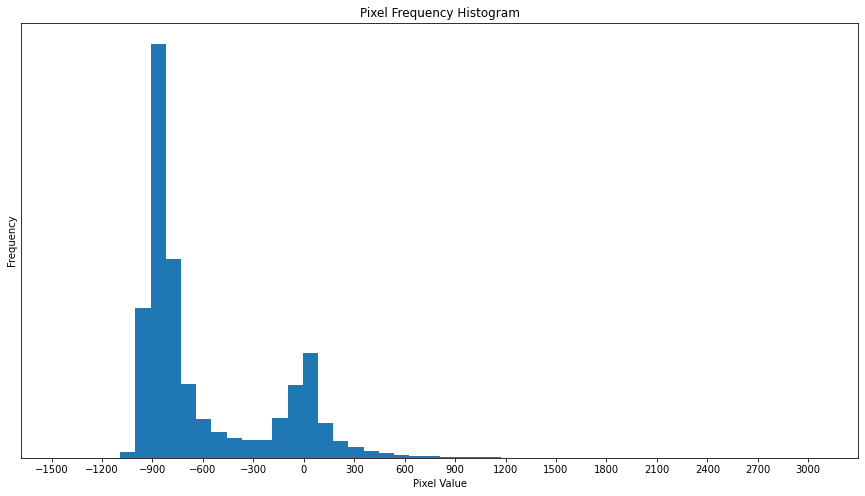

In [8]:
plt.figure(figsize=(15,8))
plt.hist(x.reshape(-1), density=True, bins=50)
plt.gca().set(title='Pixel Frequency Histogram', ylabel='Frequency', xlabel = 'Pixel Value');
plt.xticks(np.arange(-1500, 3100, 300))
plt.yticks([])

The data is normalized, shuffled (since currently, all the malignant data precedes all the benign data), stacked, partitioned and finally the images and labels are separated (while preserving order).

In [9]:
normalized_data = [[min_max_normalize(nodule[0]), nodule[1]] for nodule in concatenated_data]

In [10]:
random.shuffle(normalized_data)
shuffled_stack = stack_data(normalized_data)

In [11]:
training_data, testing_data = split_data(shuffled_stack, 0.8)

In [12]:
training_images, testing_images = get_image_data(training_data, testing_data)
training_labels, testing_labels = get_labels(training_data, testing_data)

One hot coding is done on the labels in order to convert them to binary vectors

In [13]:
training_labels = keras.utils.to_categorical(training_labels).astype(np.integer)
testing_labels = keras.utils.to_categorical(testing_labels).astype(np.integer)

The data is reshaped one more time in order to suit the keras model's expected input dimensions. 2D input will be a single numpy array with dimensions (Number of training samples, 227, 227, 3), where the 3 represents the data channels. 3D input will be a single numpy array with dimensions (Number of training samples, 111, 111, 20, 3). 

In [14]:
if data_dimension == "2d":
    training_images_final = np.array(training_images).reshape(len(training_images), WIDTH, HEIGHT, 3)
    testing_images_final = np.array(testing_images).reshape(len(testing_images), WIDTH, HEIGHT, 3)

elif data_dimension == "3d":
    training_images_final = np.array(training_images).reshape(len(training_images), WIDTH, HEIGHT, DEPTH, 3)
    testing_images_final = np.array(testing_images).reshape(len(testing_images), WIDTH, HEIGHT, DEPTH, 3)

The image and label training and testing data are saved. This data is now ready to be fed into the CNN model with no more preprocessing.

In [15]:
np.save("{0}_training_data_{1}.npy".format(data_dimension, normalization_method), training_images_final)
np.save("{0}_training_labels_{1}.npy".format(data_dimension, normalization_method), training_labels)
np.save("{0}_testing_data_{1}.npy".format(data_dimension, normalization_method), testing_images_final)
np.save("{0}_testing_labels_{1}.npy".format(data_dimension, normalization_method), testing_labels)